# Plotting maps example

This notebook gives a minimal example of using acs_plotting_maps.py

Code is available publically here [https://github.com/AusClimateService/plotting_maps/blob/main/acs_plotting_maps.py]

The README [https://github.com/AusClimateService/plotting_maps/tree/main] gives cloning instructions and virtual environment requirements to ensure it runs smoothly.

For example, in your working directory (eg navigate to your home, scratch, or user directory in a project using cd), clone this repository to access this code 
```
$ git clone https://github.com/AusClimateService/plotting_maps.git plotting_maps
```

This code is designed to work with hh5 analysis3-24.04 virtual environment. Eg:
```
$ module use /g/data/hh5/public/modules
$ module load conda_concept/analysis3-24.04
```


# Step 1 - access plotting package
Navigate to the directory that you have cloned the plotting_maps repo to. eg
```
cd ~/plotting_maps
```

In [1]:
cd /g/data/mn51/users/gt3409/plotting_maps/

/g/data/mn51/users/gt3409/plotting_maps


Then import the plotting function ```plot_acs_hazard``` and helpful dictionaries ```regions_dict, cmap_dict, tick_dict```

In [2]:
# import ACS plotting maps and Xarray.
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap
from acs_plotting_maps import plot_acs_hazard, plot_acs_hazard_3pp, regions_dict, cmap_dict, tick_dict
import xarray as xr

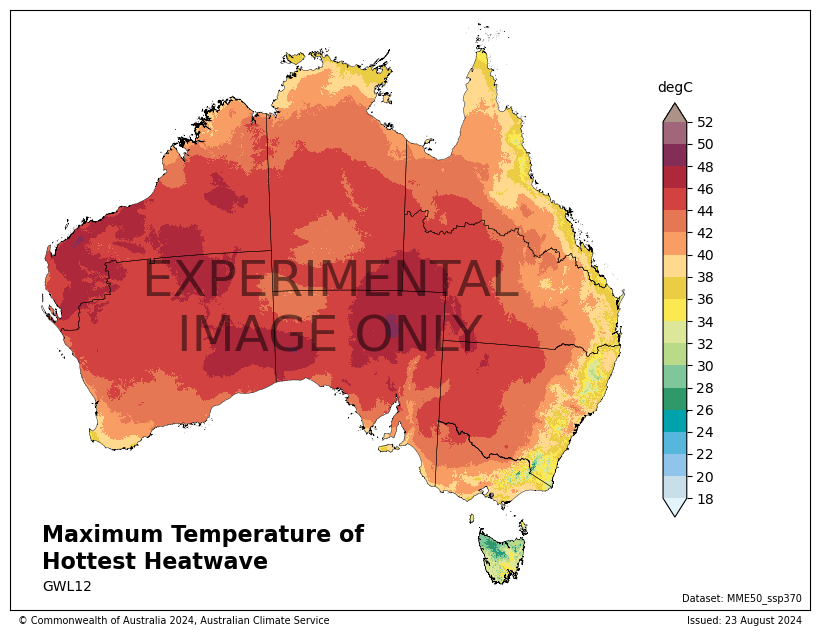

In [3]:
filename = "/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc"
ds = xr.open_dataset(filename)
cmap_dict.update({'tasmax' : ListedColormap(colors=['#E3F4FB','#C8DEE8','#91C4EA','#56B6DC','#00A2AC','#30996C','#7FC69A','#B9DA88','#DCE799','#FCE850','#EACD44','#FED98E','#F89E64','#E67754','#D24241','#AD283B','#832D57','#A2667A','#AB9487'],name='tasmax'),})
var = "HWAtx"
regions = regions_dict["ncra_regions"].to_crs(crs = "GDA2020")
# stippling_mask = ds[var]>42

fig, ax = plot_acs_hazard(data = ds[var],
                # stippling=stippling_mask,
                regions = regions,
                title = "Maximum Temperature of \nHottest Heatwave",
                date_range = "GWL12",
                figsize=(8, 6),
                cmap = cmap_dict["tasmax"],
                ticks = np.arange(18,53,2),
                cbar_label = "degC",
                cbar_extend = "both",                
                dataset_name = "MME50_ssp370",
                outfile = "figures/out.png",
               watermark_color="k");

(<Figure size 1000x400 with 5 Axes>, <Axes: >)

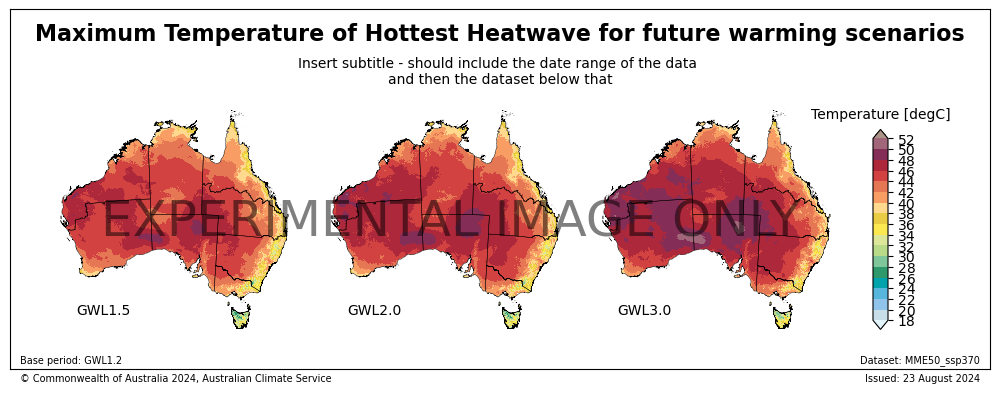

In [4]:
var = "HWAtx"

ds_gwl12 =xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL12.nc")
ds_gwl15 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL15.nc")
ds_gwl20 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL20.nc")
ds_gwl30 = xr.open_dataset("/g/data/ia39/ncra/heat/data/HWAtx/bias-corrected/ensemble/GWL-average/HWAtx_AGCD-05i_MME50_ssp370_v1-r1-ACS-QME-AGCD-1960-2022_GWL30.nc")

plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var], 
                    ds_gwl20 = ds_gwl20[var],
                    ds_gwl30 = ds_gwl30[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Temperature [degC]",
                    title=f"Maximum Temperature of Hottest Heatwave for future warming scenarios", 
                    date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
                    baseline = "GWL1.2", 
                    dataset_name= "MME50_ssp370",
                    issued_date=None,
                    watermark="EXPERIMENTAL IMAGE ONLY", 
                    watermark_color="k",
                    cmap = cmap_dict["tasmax"],
                    ticks = np.arange(18,53,2),)

In [ ]:
plot_acs_hazard_3pp(ds_gwl15 = ds_gwl15[var], 
                    ds_gwl20 = ds_gwl20[var],
                    ds_gwl30 = ds_gwl30[var],
                    regions = regions_dict['ncra_regions'],
                    cbar_label=f"Temperature [degC]",
                    title=f"Maximum Temperature of Hottest Heatwave for future warming scenarios", 
                    date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
                    baseline = "GWL1.2", 
                    dataset_name= "MME50_ssp370",
                    issued_date=None,
                    watermark="EXPERIMENTAL IMAGE ONLY", 
                    watermark_color="k",
                    cmap = cmap_dict["tasmax"],
                    ticks = np.arange(18,53,2),
                    mask_not_australia = True)

KeyboardInterrupt: 

In [ ]:
import datetime
import os

# import packages used in this workflow
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image, cm
import xarray as xr
import cartopy.crs as ccrs

# import colormap packages
import cmaps
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

from shapely.geometry import box

# define some standard imput for the maps
crs = ccrs.LambertConformal(
    central_latitude=-24.75,
    central_longitude=134.0,
    cutoff=30,
    standard_parallels=(-10, -40),
)


In [ ]:
australia = regions_dict["australia"].copy()

# Define the CRS of the shapefile manually
australia.crs = crs

In [ ]:
australia

In [ ]:
# three panel plot

In [ ]:

import datetime
import os

# import packages used in this workflow
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image, cm
import xarray as xr
import cartopy.crs as ccrs

# import colormap packages
import cmaps
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

from shapely.geometry import box

name="aus_states_territories"
regions=None
data=None
station_df=None
stippling=None
mask_not_australia=True
facecolor=None
edgecolor="black"
figsize=(8, 6)
ax=None
title=None
date_range=""
crs=None
area_linewidth=0.3
xlim=(114, 162)
ylim=(-43, -8)
cmap=cm.Greens
cbar_extend="both"
ticks=None
tick_labels=None
cbar_label=""
baseline=None
dataset_name=None
issued_date=None
label_states=False
contourf=False
contour=False
select_area=None
land_shadow=False
watermark="EXPERIMENTAL\nIMAGE ONLY"
watermark_color = "r"
show_logo = False
infile=None
outfile=None
savefig=True



australia = regions_dict["australia"].copy()

# Define the CRS of the shapefile manually
australia.crs = crs

# This mask is a rectangular box around the maximum land extent of Australia
# with a buffer of 10 degrees on every side,
# with the Australian land area cut out so only the ocean is hidden.
not_australia = gpd.GeoSeries(
    data=[
        box(*box(*australia.total_bounds).buffer(20).bounds).difference(
            australia["geometry"].values[0]
        )
    ],
    crs=ccrs.PlateCarree(),
)

crs = ccrs.LambertConformal(
    central_latitude=-24.75,
    central_longitude=134.0,
    cutoff=30,
    standard_parallels=(-10, -40),
)

In [ ]:
 gpd.GeoSeries(
    data=[
        box(*box(*australia.total_bounds).bounds).difference(
            australia["geometry"].values[0]
        )
    ],
    crs=ccrs.PlateCarree(),
)

In [ ]:
PATH = "/g/data/ia39/aus-ref-clim-data-nci/shapefiles/data"
name = "ncra_regions"
geoms = regions.geometry

def plot_data(regions=None,
              data=None, 
              station_df = None,
              xlim=(114, 162),
              ylim=(-43, -8),
              cmap=cm.Greens,
              cbar_extend="both",
              ticks=None,
              tick_labels=None,
              contourf=False,
              contour=False,
              ax=None,
              subtitle = "",
              facecolor="none",
              edgecolor="k",
              mask_not_australia = True,
              mask_australia=False,
              area_linewidth=0.3,
              stippling=None,
             ):

    # for station data
    if station_df is not None:
        # assuming columns are named "lon", "lat", variable,
        gdf = gpd.GeoDataFrame(
            station_df, geometry=gpd.points_from_xy(station_df.lon, station_df.lat), crs=ccrs.PlateCarree()
            )
        var = gdf.columns[[2]][0]
        norm = BoundaryNorm(ticks, cmap.N, extend=cbar_extend)
        cont = ax.scatter(x=station_df.lon,
                          y=station_df.lat,
                          s=100, 
                          c=station_df[var],
                          edgecolors="k", 
                          alpha = 0.8,
                          zorder=6,
                          transform=ccrs.PlateCarree(), 
                          cmap= cmap,
                          norm = norm)
        facecolor = "lightgrey"
        
    if data is None:
        return
    else:
        data = data.squeeze()
    
        facecolor = "none"
    
        if ticks is None:
            norm = None
        else:
            # if ticks are labelled or if there is one more tick than tick labels,
            # do the usual normalisation
            if tick_labels is None or (len(tick_labels) == len(ticks) - 1):
                norm = BoundaryNorm(ticks, cmap.N, extend = cbar_extend)
                if tick_labels is not None:
                    middle_ticks = [
                        (ticks[i + 1] + ticks[i]) / 2 for i in range(len(ticks) - 1)
                    ]
                else:
                    middle_ticks = []
            else:
                middle_ticks = [
                    (ticks[i + 1] + ticks[i]) / 2 for i in range(len(ticks) - 1)
                ]
                outside_bound_first = [ticks[0] - (ticks[1] - ticks[0]) / 2]
                outside_bound_last = [ticks[-1] + (ticks[-1] - ticks[-2]) / 2]
                bounds = outside_bound_first + middle_ticks + outside_bound_last
                norm = BoundaryNorm(bounds, cmap.N, extend = cbar_extend)
    
        # plot the hazard data
        if contourf and tick_labels is None:
            if data.max()>=0 and data.min()<=0: 
                print("Using contourf to plot data. Use with caution and check output for data crossing zero")
            cont = ax.contourf(
                data.lon,
                data.lat,
                data,
                cmap=cmap,
                norm=norm,
                levels=ticks,
                extend=cbar_extend,
                zorder=2,
                transform=ccrs.PlateCarree(),
            )
        else:
            cont = ax.pcolormesh(
                data.lon,
                data.lat,
                data,
                cmap=cmap,
                norm=norm,
                zorder=2,
                transform=ccrs.PlateCarree(),
            )
       
        if contour and tick_labels is None:
            cont = ax.contour(
                data.lon,
                data.lat,
                data,
                colors="grey",
                norm=norm,
                levels=ticks,
                extend=cbar_extend,
                linewidths=0.2,
                zorder=3,
                transform=ccrs.PlateCarree(),
            )
            
    ax.set_extent([xlim[0], xlim[1], ylim[0], ylim[1]])

    ax.add_geometries(
        geoms,
        crs=ccrs.PlateCarree(),
        facecolor="none",
        edgecolor="k",
        linewidth=area_linewidth,
        zorder=5,
    )

    ax.text(
        x=0.1,
        y=0.07,
        s=subtitle,
        fontsize=10,
        horizontalalignment="left",
        transform=ax.transAxes,
        zorder=10,
    )

    return ax, norm, cont

In [ ]:
def plot_cbar(cont=None, norm=None, ax=None, cbar_extend=None, 
              cbar_label=None,
              ticks=None, tick_labels=None, middle_ticks=[], 
              cbar_bounds = [0.82, 0.15, 0.03, 0.7]):
    cbar = None
    
    if station_df is not None:
        cbar = plt.colorbar(
                cont,
                ax=ax,
                extend=cbar_extend,
                cax=ax.inset_axes(cbar_bounds),
                ticks=ticks,
                norm=norm,
            )
    
    
    if tick_labels is None:
        cbar = plt.colorbar(
            cont,
            ax=ax,
            extend=cbar_extend,
            cax=ax.inset_axes(cbar_bounds),
            ticks=ticks,
            norm=norm,
        )
    else:
        # for categorical data
        cbar = plt.colorbar(
            cont,
            ax=ax,
            extend='neither',
            cax=ax.inset_axes(cbar_bounds),
            ticks=ticks,
            norm=norm,
            drawedges=True,
        )
        if len(ticks) == len(tick_labels):
            cbar.ax.set_yticks(ticks, tick_labels)
        elif len(middle_ticks) == len(tick_labels):
            cbar.ax.set_yticks(middle_ticks, tick_labels)

    cbar.ax.tick_params(labelsize=7)
    if contour and tick_labels is None:
        cbar.add_lines(cont)
    
    # Label colorbar
    if cbar is not None:
        cbar.ax.set_title(cbar_label, zorder=8, loc="center", fontsize=10, verticalalignment="bottom")
    return ax

In [ ]:
def plot_select_area(select_area=None, ax=ax, xlim=xlim, ylim=ylim, regions=regions, crs=crs, land_shadow=land_shadow):
    # if select a specific area
    if select_area is None:
        ax.set_extent([xlim[0], xlim[1], ylim[0], ylim[1]])
    else:
        assert isinstance(select_area, list), "select_area must be a list"
        # select state
        name_column = [name for name in regions.columns if "NAME" in name.upper()][0]
        area = regions.loc[regions[name_column].isin(select_area)]
        map_total_bounds = area.total_bounds
        minx, miny, maxx, maxy = map_total_bounds
        mid_x = (minx + maxx) / 2
        mid_y = (miny + maxy) / 2
        max_range = np.max([(maxy - miny), (maxx - minx)])
        buffer = 0.1 * max_range
    
        not_area = gpd.GeoSeries(
            data=[
                box(*box(*map_total_bounds).buffer(10 * buffer).bounds).difference(
                    area.dissolve()["geometry"].values[0]
                )
            ],
            crs=crs,
        )
    
        # mask outside selected area
        if land_shadow:
            # show land as light grey
            not_area.plot(ax=ax, facecolor="lightgrey", linewidth=0, zorder=4)
        else:
            # mask white
            not_area.plot(ax=ax, facecolor="white", linewidth=0, zorder=4)
    
        ax.xlim(mid_x - 0.6 * max_range, mid_x + 0.8 * max_range)
        ax.ylim(mid_y - 0.7 * max_range, mid_y + 0.7 * max_range)
    return ax

In [ ]:
def plot_titles(title="title",
                date_range = "DD Mon YYY to DD Mon YYYY", 
                ax=ax, 
                baseline = None, 
                dataset_name= "dataset_name",
                issued_date=None,
                watermark=watermark, 
                watermark_color=watermark_color):
    # Set the plot title and axis labels    
    ax.text(
        x=0.5,
        y=0.95,
        s=f"{title}",
        fontsize=16,
        weight="bold",
        horizontalalignment="center",
        verticalalignment="top",
        transform=ax.transAxes,
        zorder=10,
    )

    ax.text(
        x=0.5,
        y=0.87,
        s=f"{date_range}",
        fontsize=10,
        horizontalalignment="center",
        verticalalignment="top",
        transform=ax.transAxes,
        zorder=10,
    )
    
    if baseline is not None:
        # print base period inside bottom left corner
        ax.text(
            x=0.01,
            y=0.02,
            s=f"Base period: {baseline}",
            fontsize=7,
            transform=ax.transAxes,
            zorder=10,
        )
    # print copyright outside bottom left corner
    ax.text(
        x=0.01,
        y=-0.04,
        s=f"\u00A9 Commonwealth of Australia {datetime.datetime.now().year}, Australian Climate Service",
        fontsize=7,
        transform=ax.transAxes,
        zorder=10,
    )
    # print data source inside bottom right
    ax.text(
        x=0.99,
        y=0.02,
        s=f"Dataset: {dataset_name}",
        fontsize=7,
        transform=ax.transAxes,
        horizontalalignment="right",
        zorder=10,
    )
    # print issued date on bottom right under the border.
    # Set to today's date if None supplied
    if issued_date is None:
        issued_date = datetime.datetime.today().date().strftime("%d %B %Y")
    ax.text(
        x=0.99,
        y=-0.04,
        s=f"Issued: {issued_date}",
        fontsize=7,
        transform=ax.transAxes,
        horizontalalignment="right",
        zorder=10,
    )
    
    if watermark is not None:
        ax.text(
            x=0.45,
            y=0.41,
            s=watermark.upper(),
            fontsize=36,
            transform=ax.transAxes,
            horizontalalignment="center",
            verticalalignment="center",
            zorder=10,
            wrap=True,
            alpha=0.5,
            color=watermark_color,
        )
    ax.axis('off')
    return ax

In [ ]:
ds[var]

In [ ]:
import matplotlib.pyplot as plt
import datetime
import os

# import packages used in this workflow
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image, cm
import xarray as xr
import cartopy.crs as ccrs

# import colormap packages
import cmaps
from matplotlib.colors import ListedColormap, BoundaryNorm, LinearSegmentedColormap

from shapely.geometry import box

# define some standard imput for the maps
crs = ccrs.LambertConformal(
    central_latitude=-24.75,
    central_longitude=134.0,
    cutoff=30,
    standard_parallels=(-10, -40),
)

In [ ]:
def plot_data(regions=None,
              data=None, 
              station_df = None,
              xlim=(114, 162),
              ylim=(-43, -8),
              cmap=cm.Greens,
              cbar_extend="both",
              ticks=None,
              tick_labels=None,
              contourf=False,
              contour=False,
              ax=None,
              subtitle = "",
              facecolor="none",
              edgecolor="k",
              mask_not_australia = True,
              mask_australia=False,
              area_linewidth=0.3,
              stippling=None,
             ):
    """This function takes an axis and plots the hazard data to a map of Australia"""
   
    # for station data
    if station_df is not None:
        # assuming columns are named "lon", "lat", variable,
        gdf = gpd.GeoDataFrame(
            station_df, geometry=gpd.points_from_xy(station_df.lon, station_df.lat), crs=ccrs.PlateCarree()
            )
        var = gdf.columns[[2]][0]
        norm = BoundaryNorm(ticks, cmap.N, extend=cbar_extend)
        cont = ax.scatter(x=station_df.lon,
                          y=station_df.lat,
                          s=100, 
                          c=station_df[var],
                          edgecolors="k", 
                          alpha = 0.8,
                          zorder=6,
                          transform=ccrs.PlateCarree(), 
                          cmap= cmap,
                          norm = norm)
        # facecolor = "lightgrey"

    middle_ticks=[]
    
    if data is None:
        return
    else:
        data = data.squeeze()
    
        # facecolor = "none"
    
        if ticks is None:
            norm = None
        else:
            # if ticks are labelled or if there is one more tick than tick labels,
            # do the usual normalisation
            if tick_labels is None or (len(tick_labels) == len(ticks) - 1):
                norm = BoundaryNorm(ticks, cmap.N, extend = cbar_extend)
                if tick_labels is not None:
                    middle_ticks = [
                        (ticks[i + 1] + ticks[i]) / 2 for i in range(len(ticks) - 1)
                    ]
                else:
                    middle_ticks = []
            else:
                middle_ticks = [
                    (ticks[i + 1] + ticks[i]) / 2 for i in range(len(ticks) - 1)
                ]
                outside_bound_first = [ticks[0] - (ticks[1] - ticks[0]) / 2]
                outside_bound_last = [ticks[-1] + (ticks[-1] - ticks[-2]) / 2]
                bounds = outside_bound_first + middle_ticks + outside_bound_last
                norm = BoundaryNorm(bounds, cmap.N, extend = cbar_extend)
    
        # plot the hazard data
        if contourf and tick_labels is None:
            if data.max()>=0 and data.min()<=0: 
                print("Using contourf to plot data. Use with caution and check output for data crossing zero")
            cont = ax.contourf(
                data.lon,
                data.lat,
                data,
                cmap=cmap,
                norm=norm,
                levels=ticks,
                extend=cbar_extend,
                zorder=2,
                transform=ccrs.PlateCarree(),
            )
        else:
            cont = ax.pcolormesh(
                data.lon,
                data.lat,
                data,
                cmap=cmap,
                norm=norm,
                zorder=2,
                transform=ccrs.PlateCarree(),
            )
       
        if contour and tick_labels is None:
            cont = ax.contour(
                data.lon,
                data.lat,
                data,
                colors="grey",
                norm=norm,
                levels=ticks,
                extend=cbar_extend,
                linewidths=0.2,
                zorder=3,
                transform=ccrs.PlateCarree(),
            )

    ax.set_extent([xlim[0], xlim[1], ylim[0], ylim[1]])
    
    if stippling is not None:
        ax.contourf(stippling.lon,
                    stippling.lat,
                    stippling,
                    alpha=0,
                    hatches = ["",".."],
                    zorder=5,
                    transform=ccrs.PlateCarree(),
                   )

    if mask_not_australia:
        # outside the shape, fill white
        ax.add_geometries(
            not_australia,
            crs=not_australia.crs,
            facecolor="white",
            linewidth=0,
            zorder=5,
        )

    # cover australia land area eg for ocean data
    if mask_australia:
        # inside the shape, fill white
        ax.add_geometries(
            regions["geometry"],
            crs=ccrs.PlateCarree(),
            facecolor="white",
            linewidth=0,
            zorder=5,
        )


    # add region borders
    ax.add_geometries(
        regions["geometry"],
        crs=ccrs.PlateCarree(),
        facecolor=facecolor,
        edgecolor=edgecolor,
        linewidth=area_linewidth,
        zorder=5,
    )

    # subtitle
    ax.text(
        x=0.1,
        y=0.07,
        s=subtitle,
        fontsize=10,
        horizontalalignment="left",
        transform=ax.transAxes,
        zorder=10,
    )

    return ax, norm, cont, middle_ticks

In [ ]:
mask_not_australia

In [ ]:
cmap = cmap_dict["tasmax"]
ticks = np.arange(18,53,2)
cbar_extend = "both"              

fig, axs = plt.subplots(nrows=1, ncols=3,  sharey=True, sharex=True, figsize=(10,4),subplot_kw={'projection': crs},)
i=0
ds = ds_gwl15
ax, norm, cont, _ = plot_data(data=ds[var], 
                          regions=regions,
                      ticks=ticks,
                      cmap=cmap,
                      cbar_extend=cbar_extend,
                      ax=axs[i],
                         xlim=(114,154),
                          subtitle=f"GWL{[1.5,2,3][i]}",
                              mask_australia=False,
                        mask_not_australia=False,
                         )
ax.axis('off')

In [ ]:
cmap = cmap_dict["tasmax"]
ticks = np.arange(18,53,2)
cbar_extend = "both"              

fig, axs = plt.subplots(nrows=1, ncols=3,  sharey=True, sharex=True, figsize=(10,4),subplot_kw={'projection': crs},)

for i, ds in enumerate([ds_gwl15, ds_gwl20, ds_gwl30]):
    ax, norm, cont= plot_data(data=ds[var], 
                              regions=regions,
                          ticks=ticks,
                          cmap=cmap,
                          cbar_extend=cbar_extend,
                          ax=axs[i],
                             xlim=(114,154),
                              subtitle=f"GWL{[1.5,2,3][i]}",
                             )
    ax.axis('off')

# fig.subplots_adjust(left=0.05, bottom=0, right=0.85, top=0.95, wspace=0.05, hspace=0.05)
# cbar_ax = fig.add_axes([0.87, 0.2, 0.03, 0.5]) #left bottom width height
# cbar_ax.axis('off')

# plot_cbar(cont=cont, norm=norm, ax=cbar_ax, cbar_extend=cbar_extend, 
#               ticks=ticks, tick_labels=tick_labels, middle_ticks=[], 
#               cbar_bounds = [0.1,0,0.5,1], cbar_label=f"Temperature [{ds[var].units}]")

# #plot border and annotations
# ax111 = fig.add_axes([0.01,0.1,0.98,0.9], facecolor="none", xticks=[], yticks=[]) #(left, bottom, width, height)

# plot_titles(title=f"{ds[var].long_name.title()} for future warming scenarios", 
#             date_range = "Insert subtitle - should include the date range of the data \nand then the dataset below that", 
#                 ax=ax111, 
#                 baseline = "baseline", 
#                 dataset_name= "dataset_name",
#                 issued_date=None,
#                 watermark="EXPERIMENTAL IMAGE ONLY", 
#                 watermark_color="k",
#            )
# ax111.axis(True)


In [ ]:


if regions is None:
    try:
        regions = regions_dict[name]
    except:
        print(f"Could not read regions_dict[{name}]")

# Set default crs for Australia maps and selection maps
if crs is None:
    if select_area is None:
        # Default for Australian map
        crs = ccrs.LambertConformal(
            central_latitude=-24.75,
            central_longitude=134.0,
            cutoff=30,
            standard_parallels=(-10, -40),
        )
    else:
        crs = ccrs.PlateCarree()

# Define the CRS of the shapefile manually
regions = regions.to_crs(crs.proj4_init)

if ax is None:
    # Set up the plot
    fig = plt.figure(
        figsize=figsize,
        zorder=1,
        layout="constrained",
    )
    ax = plt.axes(
        projection=crs,
        )
else:
    # fig=plt.gcf()
    ax=ax        

ax.set_global()

if infile is not None:
    data = xr.open_dataset(infile)

ax, norm, cont = plot_data(data=None, 
                           ticks=ticks,
                           tick_labels=tick_labels, 
                           cmap=cmap,
                           cbar_extend=cbar_extend,
                           contourf=contourf,
                           contour=contour,
                           ax=ax,
                           xlim=xlim,
                           ylim=ylim)

ax = plot_cbar(cont=cont, norm=norm, ax=ax, cbar_extend=cbar_extend, 
              ticks=ticks, tick_labels=tick_labels, middle_ticks=middle_ticks, 
              cbar_bounds = [0.82, 0.15, 0.03, 0.7])


ax = plot_select_area(select_area=None, ax=ax, xlim=xlim, ylim=ylim, regions=regions, crs=crs, land_shadow=land_shadow)

plot_titles(title="title",
                date_range = "DD Mon YYY to DD Mon YYYY", 
                ax=ax, 
                baseline = None, 
                dataset_name= "dataset_name",
                issued_date=None,
                watermark=watermark, 
                watermark_color=watermark_color)


# remove any lat lon labels and ticks
ax.set_xlabel("")
ax.set_ylabel("")
ax.tick_params(
    axis="both",
    which="both",
    bottom=False,
    left=False,
    labelbottom=False,
    labelleft=False,
)

ax.patch.set_edgecolor("black")
ax.patch.set_linewidth(2)

# fig.set_figheight(figsize[1])
# fig.set_figwidth(figsize[0])


if show_logo:
    # Place logo in top left
    ins = ax.inset_axes(
        [0.0, 0.78, 0.3, 0.3],
    )
    ins.set_xticks([])
    ins.set_yticks([])
    ins.imshow(
        logo,
    )

if outfile is None:
    PATH = os.path.abspath(os.getcwd())
    outfile = f"{PATH}/figures/{title.replace(' ', '_')}.png"
    os.makedirs(os.path.dirname(outfile), exist_ok=True)

if savefig:
    plt.savefig(outfile, dpi=300)

## Step 4: Calculate NCRA region statistics

In [ ]:
# import needed packages
from acs_area_statistics import acs_regional_stats, get_regions

regions = get_regions(["ncra_regions", "australia"])

In [ ]:
# calculate the stats using the acs_region_fractional_stats function
# Find the min, mean, max value for each region
how = ["mean", "min", "max"]
outfile = filename.split('/')[-1].replace(".nc", f"_summary-{'-'.join(how)}_ncra-regions.csv")
da_summary = acs_regional_stats(ds=ds, 
                                mask = "fractional", 
                                dims=("lat", "lon"),
                                how=how,
                                outfile = outfile)
da_summary


# Access the docstring for more info

In [ ]:
plot_acs_hazard?

In [ ]:
acs_regional_stats?